In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# iris

iris:pd.DataFrame = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
from sklearn.model_selection import train_test_split

x = iris.drop('species', axis=1)
y = iris['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(120, 4) (30, 4) (120,) (30,)
species
setosa        40
virginica     40
versicolor    40
Name: count, dtype: int64
species
setosa        10
virginica     10
versicolor    10
Name: count, dtype: int64


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(1, 10), 'criterion':['gini', 'entropy', 'log_loss']}

cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)

cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 10)})

In [19]:
best_model = cv.best_estimator_
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print('accuracy_score:', accuracy_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred, average='macro'))

accuracy_score: 0.9333333333333333
f1_score: 0.9333333333333332


In [20]:
best_model.feature_importances_

array([0.00632911, 0.01687764, 0.56563878, 0.41115447])

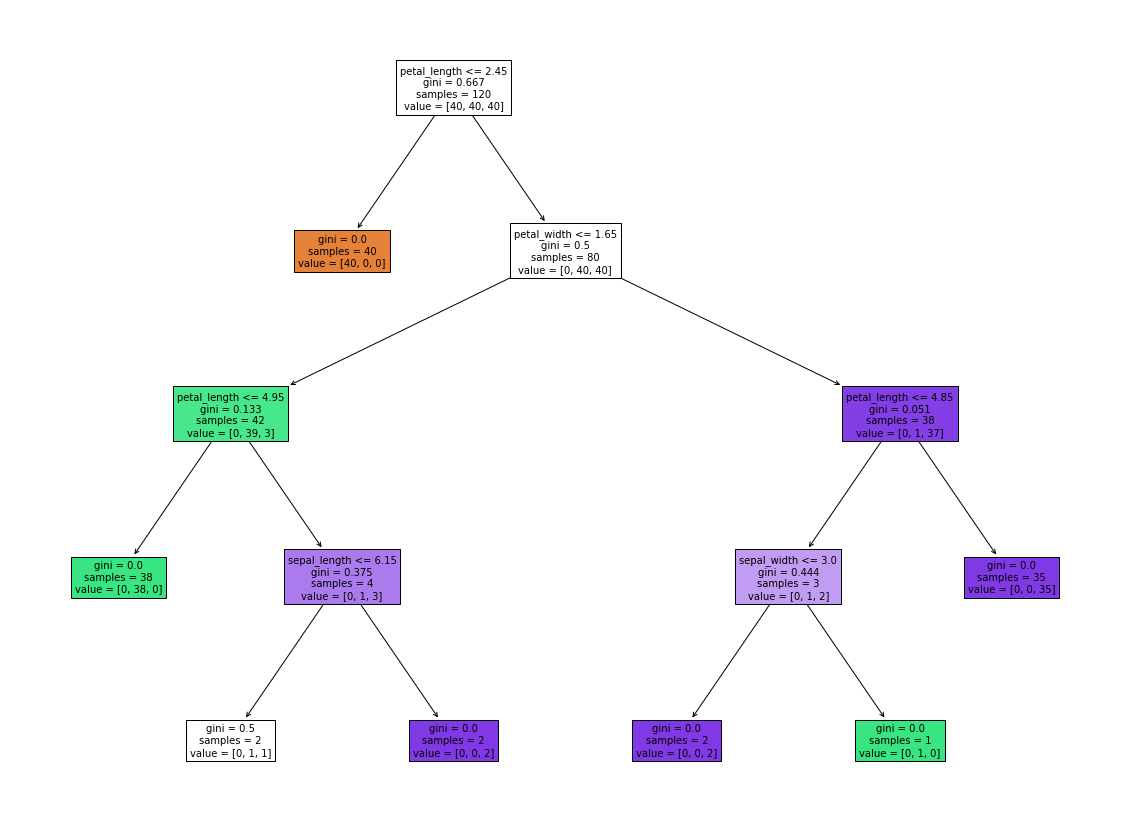

In [22]:
# Tree Visualization with plot_tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(best_model, feature_names=x.columns, filled=True, fontsize=10)
plt.show()


